In [1]:
import pandas as pd
import numpy as np
# seaborn 可以幫忙進行資料視覺化
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
## 加州房市資料集參考: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
california_dataset = fetch_california_housing()
## 看看這個資料集中有什麼東西
print(california_dataset.keys())
## 將房市資料轉換成房市資料集
california = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
## 將資料集的部分出來看
print(california.head())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [3]:
# 在我們的資料集中加入目標資料:房價
california['target']= california_dataset.target

# 同樣將前面幾列印出來看
print(california.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [4]:
# 檢查是否有缺失值
california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

C:\Users\CKN\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

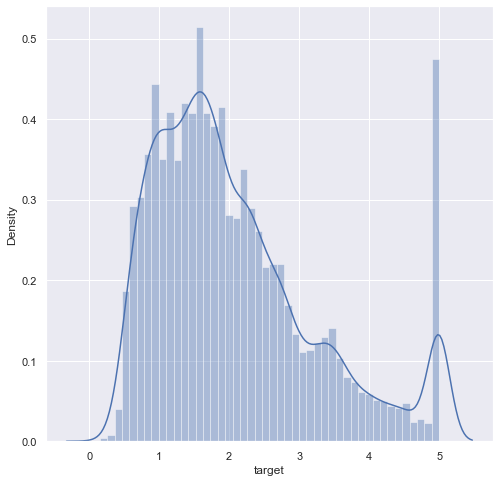

In [5]:
# 使用 seaborn 套件來看一下資料的分布。
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(california['target'])

<AxesSubplot:>

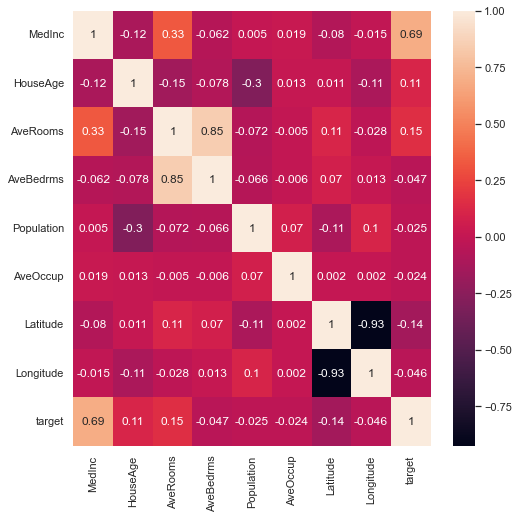

In [6]:
# 計算資料間的相關程度
correlation_matrix = california.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)